In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import log_loss
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
from pandas import DataFrame as df
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

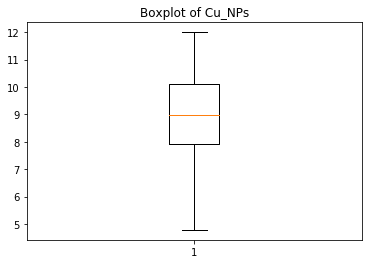

5cv: 0.6671136907044777 TEST: 0.724298646778067
rmse_5CV 0.627821022133962


In [3]:
data = pd.read_csv(r'H:\Cu_NPs_RF.csv',engine='python')
df = pd.DataFrame(data)
plt.figure(figsize=(6, 4))
plt.boxplot(df['Cu_NPs'])
plt.title('Boxplot of Cu_NPs')
plt.show()
Q1 = df['Cu_NPs'].quantile(0.25)
Q3 = df['Cu_NPs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Cu_NPs'] >= lower_bound) & (df['Cu_NPs'] <= upper_bound)]
df = df[(df['Cu_NPs'] > 4.78)]
df.iloc[:, :1] = df.iloc[:, :1].astype(str)
df.fillna(df.mean())
data2 = df.fillna(df.mean())
y = data2['Cu_NPs']
columns_to_drop = ['No.', 'Ag_NPs', 'Cr_NPs', 'Cu_NPs', 'Fe_NPs', 'Hg_NPs', 'Mn_NPs', 'Pb_NPs', 'Ti_NPs']
x = data2.drop(columns=columns_to_drop, axis=1)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=125)
rfc = RandomForestRegressor(random_state=60)
CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
regressor = rfc.fit(Xtrain, Ytrain)
CV_predictions = cross_val_predict(rfc, Xtrain,Ytrain,cv=5)
rmse = np.sqrt(mean_squared_error(Ytrain,CV_predictions))
score_test = regressor.score(Xtest,Ytest)
print("5cv:",CV_score,"TEST:",score_test)
print("rmse_5CV",rmse)

In [4]:
score_5cv_all = []
for i in range(0, 200, 1):
    rfc =RandomForestRegressor(random_state=i)
    score_5cv =cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
random_state_5cv = range(0, 200)[score_5cv_all.index(max(score_5cv_all))]

print("Best_5cv score：{}".format(score_max_5cv),
      "random_5cv:{}".format(random_state_5cv))


score_5cv_all = []
for i in range(1, 400, 1):
    rfc = RandomForestRegressor(n_estimators=i
                                , random_state=random_state_5cv)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
n_est_5cv = range(1,400)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "n_est_5cv:{}".format(n_est_5cv)) 


score_5cv_all = []
for i in range(1, 300, 1):
    rfc = RandomForestRegressor(n_estimators=n_est_5cv
                                ,random_state=random_state_5cv
                                ,max_depth=i)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
max_depth_5cv = range(1,300)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_depth_5cv:{}".format(max_depth_5cv))


score_5cv_all = []
for i in range(1,x.shape[1]+1):
    rfc = RandomForestRegressor(n_estimators=n_est_5cv
                                ,random_state=random_state_5cv
                                ,max_depth=max_depth_5cv
                                ,max_features=i)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
max_features_5cv = range(1, x.shape[1]+1)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_features_5cv:{}".format(max_features_5cv))

Best_5cv score：0.681317677740449 random_5cv:13
Best_5cv score：0.6917763079476332 n_est_5cv:12
Best_5cv score：0.696507173324898 max_depth_5cv:9
Best_5cv score：0.696507173324898 max_features_5cv:3


In [5]:
rfc = RandomForestRegressor(random_state=random_state_5cv
                            ,n_estimators=n_est_5cv
                            ,max_depth=max_depth_5cv
                            ,max_features=max_features_5cv)
RandomForest = rfc.fit(Xtrain, Ytrain)
test_predictions = RandomForest.predict(Xtest)
score_test = RandomForest.score(Xtest,Ytest)
score_train = RandomForest.score(Xtrain,Ytrain)
CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
rmse = np.sqrt(mean_squared_error(Ytest,test_predictions))
mae = MAE(Ytest, test_predictions)
print("test:",score_test)
print("train:",score_train)
print("score_5cv",CV_score)
print("rmse_test",rmse)
print("MAE",mae)
expvspred_test = {'Exp':Ytest,'Pred':test_predictions}
predictions = RandomForest.predict(x)
pre_Cu = {'Exp':y,'Pred':predictions}
pd.DataFrame(pre_Cu).to_excel(r'H:\Cu_NPs_RF_regression.xlsx')
rfc.score(Xtest,Ytest)

test: 0.6960974018775618
train: 0.9131974218388951
score_5cv 0.696507173324898
rmse_test 0.7019682977386462
MAE 0.5953888888888889


0.6960974018775618

In [6]:
features_import = pd.DataFrame(Xtrain.columns, columns=['feature'])
features_import['importance'] = rfc.feature_importances_  
features_import.to_excel(r'H:\Cu_NPs_RF_imp.xlsx', index=False)
features_import

,feature,importance
0,TOC,0.270069
1,leachate_Cu,0.676301
2,leachate_Fe,0.053631


In [10]:
dp = pd.read_csv(r'H:\NPs_prediction_dataset.csv',engine='python')
dp.iloc[:, :1] = dp.iloc[:, :1].astype(str)
dp.fillna(dp.mean())
dp2 = dp.fillna(dp.mean())
columns_to_drop = [ 'leachate_Cr','leachate_Pb', 'leachate_Mn']
dp3=dp2.drop(columns=columns_to_drop, axis=1)
print(dp3)
predictions=RandomForest.predict(dp3)
pd.DataFrame(predictions).to_excel(r'H:\Cu_NPs_prediction_global.xlsx')

        TOC  leachate_Cu   leachate_Fe
0     414.0     20.00000   1200.000000
1   19476.0    721.44382    866.000000
2   24676.0    460.00000   3380.000000
3    1256.0   2660.00000  20538.604938
4    1299.0   2710.00000  20538.604938
..      ...          ...           ...
90   1061.0      3.00000    365.000000
91   1458.0    100.00000   2037.000000
92    820.0     80.00000   5500.000000
93   1000.0    100.00000   8000.000000
94   1058.0    360.00000  13200.000000

[95 rows x 3 columns]
